# Assignment 1 Cognitive Modelling <font color='red'>Deadline = 18 april 23:59</font>

Dit is de eerste opdracht voor Cognitive Modelling. Hieronder volgen vragen en opdrachten over verschillende leermodellen. Bij elke vraag staat de hoeveelheid punten die je er voor kan krijgen. In totaal kan je voor deze opdracht __94__ punten halen.

Geef antwoorden in blokken met code of met tekst. Gebruik voor antwoorden met tekst de ">" voor blockquotes en geef bij elke vraag ook __kort uitleg__ als hier om wordt gevraagd. __Let op__: soms staan er meerdere vragen bij een onderdeel, lees de tekst dus nauwkeurig. 

Sla het uiteindelijke notebook op met jullie studentnummers en achternamen in de filenaam: `studentnummer_achternaam_opdrachtnummer`. 

> Dit is een voobeeld voor het antwoord bij uitlegvragen, hier kan je eventueel `code` gebruiken.

### Matplotlib plotting basics

Hieronder een aantal links naar tutorials en documentatie voor het gebruik van `matplotlib` voor het maken van grafieken.

* [Pyplot tutorial](https://matplotlib.org/users/pyplot_tutorial.html)

* [Axis labels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html)

* [Adding a legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)

*  zie [hier](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) voor een markdown cheatsheet, en [hier](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols) voor een handige lijst $\LaTeX$ symbolen


In [1]:
# run these to initialize libraries
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

---

# Pt. 1 Het Rescorla-Wagner model

De Rescorla-Wagner theorie illustreert hoe leermethoden gevoelig kunnen zijn voor de link tussen een geconditioneerde stimulus (CS) en een ongeconditioneerde stimulus (US). In het experiment van Pavlov leert een hond de associatie tussen een belletje en het krijgen van vlees. 

Een hond produceert normaliter speeksel als voedsel (US) wordt aangeboden. Na het herhaaldelijk horen van een belletje voordat de hond het vlees krijgt, zal de hond leren dat dit belletje (CS) gevolgd wordt door het vlees. De hond zal vervolgens na het horen van het belletje al speeksel produceren. Het effect van de geconditioneerde stimulus (het belletje) wordt groter als er vaker een koppeling wordt gepresenteerd met een ongeconditioneerde stimulus (het vlees): hoe vaker de associatie aangeboden wordt, hoe groter de respons en hoe groter dus de associatieve sterkte ($V$ in het Rescorla-Wagner model). 

Het Rescorla-Wagner model vormt de basis voor alle Reinforcement Learning modelen die veelvuldig gebruikt worden in kunstmatige intelligentie. Met dit model kun je sterktes van associaties kwantificeren, en begrijpen hoe deze veranderen met tijd. Ook kunnen we verschillende simulaties met het model doen om te kijken wat voor gedrag het wel, maar ook **niet** voorspelt. Deze simulaties kunnen ons inzicht geven tot op welke hoogte een model de onderliggend cognitieve processes goed beschrijft. 

Meer details over het Rescorla-Wagner model, extinctie, compound stimuli en blocking kan je vinden in *Learning & Memory*, en in de college slides.

## 1. Associatieve sterktes

Stel dat de CS (het belletje 🔔) en de US (het vlees 🍖) 10 keer worden aangeboden. De hond had vooraf geen enkele associatie met het belletje, dus de sterkte van de associatie voordat de CS en US de eerste keer worden gepresenteerd is 0: $V_{t=0} = 0$. 

De maximale sterkte die de associatie tussen de CS en US kan hebben is 100: $V_{max} = 100$, en de leersnelheid is 0.4: $\alpha = 0.4$. 

Om het simpel te houden gaan we in de opdrachten uit van de een simpel RW model met maar één learning rate:

$$ V_{t+1} = V_t + \Delta V_t $$
$$ \Delta V_t = \alpha(V_{max} - V_t) $$

<br>

### Q1.a (4 punten)
Het belletje wordt nu voor de eerste keer aangeboden en de hond krijgt de beloning. Wat is de waarde van $V$ en $\Delta V$ na de eerste leertrial? Dus op $t = 1$?

> $\mathbf{V}_0 = 0$, $\hspace{2mm} \mathbf{V}_1 = \mathbf{V}_0 + \Delta \mathbf{V}_0 = 0 + 0.4(100 - 0) = 40$ 

### Q1.b (4 punten)

Schrijf een functie die de waardes van $V$ en $\Delta V$ kan uitrekenen en bijhouden voor meerdere leertrials. Zorg er ook voor dat je kan aangeven welke associatie er als is (of niet) tussen de stimulus en beloning.  Ga er voor de eerste opdracht van uit dat er in het begin nog geen enkele associatie is tussen de stimulus en de beloning ($V$=0). Noem de functie `rescorla_wagner()`.

Om je op weg te helpen:
```python
def rescorla_wagner(alpha, v_start, v_max, trials):
    v_list = [V_0] # list with V_0
    delta_list = [∆V_0] # list with delta V_0
    
    for _ in range(trials):
        #1 calculate V_t
        #2 store V_t in list Vs
        #3 calculate ∆V_t 
        #4 store ∆V_t in list ∆Vs

    return (v_list, delta_list)
```

**Let op!** Als je de waardes *na* 5 leertrials wilt berekenen, zal deze functie 6 waardes teruggeven voor $V$ en $\Delta V$, omdat $V_0$ en $\Delta V_0$ ook zijn toegevoegd, dat is dus de bedoeling. De eerste waarde, met index = 0, betekent na 0 leertrials. De tweede waarde, met index = 1, betekent na 1 leertrial, etc. Dus *na* 10 trials, gebruik je index = 10.

In [2]:
def rescorla_wagner(alpha, v_start, v_max, trials):
    v_list = [v_start] # list with V_0
    delta_list = [alpha*(v_max - v_start)] # list with delta V_0

    for _ in range(trials):
        v_t = v_list[-1] + delta_list[-1]
        v_list.append(v_t)
        dv_t = alpha*(v_max - v_t)
        delta_list.append(dv_t)

    return (v_list, delta_list)

### Q1.c (3 punten)

Gebruik de functie om het leren van een associatie in 10 trials te simuleren. Gebruik hiervoor dan een learning rate van 0.4 ($\alpha$), een associatie van nul om te beginnen ($V$), en een $V_{max}$ van 100. Wat zijn de berekende waardes voor $V$ en $\Delta V$ na 10 trials? Hoe interpreteer je deze waardes?

In [3]:
from tabulate import tabulate
v, d = rescorla_wagner(0.4, 0, 100, 10)
print(tabulate(np.transpose([v, d]), headers=['V', 'Delta']))

      V      Delta
-------  ---------
 0       40
40       24
64       14.4
78.4      8.64
87.04     5.184
92.224    3.1104
95.3344   1.86624
97.2006   1.11974
98.3204   0.671846
98.9922   0.403108
99.3953   0.241865


> Na elke trial word de associatie sterkte groter, dus na elke trial word er iets geleerd. Alleen de waardes voor delta V worden steeds kleiner, dat betekent dat hoe dichter de associatie sterkte komt bij de maximale assoocatie sterkte hoe minder er word bij geleerd na een trial.

### Q1.d (3 punten)
We gaan nu een aantal grafieken maken om het gedrag van het model beter te begrijpen door de leercurves te laten zien. Om je op weg te helpen is hier een functie om de grafieken weer te geven:

``` python
%matplotlib inline
import matplotlib.pyplot as plt

def plot_trials(x_label, y_label, line_labels, *results_list):
    trials = range(1, len(results_list[0])+1)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    for result in results_list:
        plt.plot(trials, result)
    
    plt.legend(line_labels)
    plt.show()

#plt.hlines(95, 0, 10, colors='red')
plot_trials(x_label, y_label, line_labels, *results_list)

```
De eerste twee argumenten gebruik je om de x- en y-as te labelen. Je kan bijvoorbeeld `x_label = r"$t$"` en `y_label = r"$V$"` gebruiken om aan te geven dat het om $t$ trials op de x-as en $V$ associatie waardes op de y-as gaat.

Plot nu de grafiek van de hele leercurve voor 10 trails van de vorige opgave ($\alpha$ = 0.4, $V_{t=0}$ = 0, $V_{max}$ = 100). Gebruik hiervoor de output van `rescorla_wagner()` en gebruik `plt.hlines(95, 0, 10, colors='red')` voordat je `plot_trials()` aanroept om een horizontale lijn om 95% toe te voegen.

Na hoeveel trials is de associatieve sterkte op 95% van de maximale associatieve sterkte? 

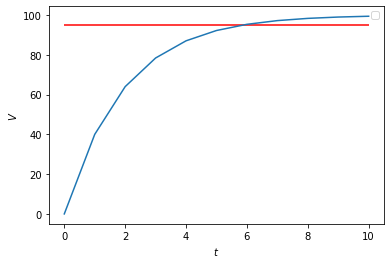

Na 6 trials is de associatieve sterkte boven de 95% van de maximale associatieve sterkte.


In [4]:
def plot_trials(x_label, y_label, line_labels, *results_list):
    trials = range(0, len(results_list[0]))
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    for result in results_list:
        plt.plot(trials, result)

    plt.legend(line_labels)
    plt.show()

plt.hlines(95, 0, 10, colors='red')
plot_trials(r"$t$", r"$V$", [], v)
print("Na 6 trials is de associatieve sterkte boven de 95% van de maximale associatieve sterkte.")

### Q1.e (4 punten)

Bereken nu ook de associatieve sterktes $V$ voor andere waardes van $\alpha$ (0.1 en 0.6). Maak een plot met de twee leercurves voor de verschillende waardes van $\alpha$. Met `line_labels = [r"$\alpha = 0.1$", r"$\alpha = 0.6$"]` kan je ervoor zorgen dat beide lijnen de juiste labels krijgen.

Wat is het effect van een hogere of lagere $\alpha$ op $V$?

Plot in een aparte grafiek ook de $\Delta V$'s, hoe verschillen die voor de verschillende $\alpha$'s ?

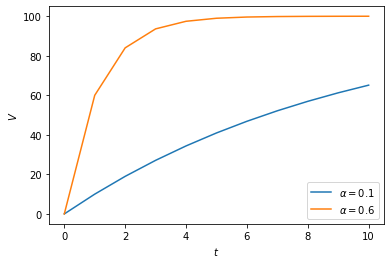

In [5]:
v_1, d_1 = rescorla_wagner(0.1, 0, 100, 10)
v_6, d_6 = rescorla_wagner(0.6, 0, 100, 10)
plot_trials(r"$t$", r"$V$", [r"$\alpha = 0.1$", r"$\alpha = 0.6$"], v_1, v_6)

> Alpha beinvloed hoe snel de associatie sterkte toeneemt na elke trial, met een hogere alpha zal het sneller stijgen aan het begin. Alleen hierdoor bereikt het ook sneller de convergentie waarde.

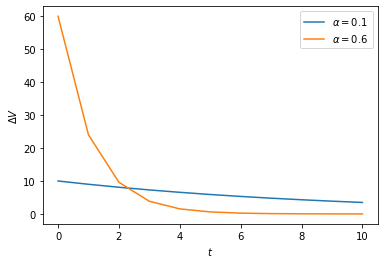

In [6]:
plot_trials(r"$t$", r"$\Delta V$", [r"$\alpha = 0.1$", r"$\alpha = 0.6$"], d_1, d_6)

> Alpha zorg voor een snellere stijging van de associatie sterkte, dit zie je ook aan dat delta V begint op 60 met alpha = 0.6. Alleen omdat het hierdoor sneller de convergentie waarde bereikt zie je ook dat Delta V sneller daalt voor een hogere alpha.

---

## 2. Extinctie curves

Nu ga je een extinctie curve plotten. Volg de stappen hieronder om de juiste waardes van $V$ te kunnen uitrekenen. In geval van extinctie begint de hond met al een sterke associatie tussen bel en beloning ($V_{t=0} > 0$), maar deze associatie dooft uit. Gebruik dus voor $V$ de laatste waarde van de vorige oprdacht. Wat er nu gaat gebeuren is dat de bel rinkelt en de hond niks krijgt (maar dat dus wel verwacht).

### Q2.a (2 punten)

Wat is de associatie waarde $V_{max}$ bij extinctie trials?


> Bij een extinctie trial daalt de associatie sterkte na elke trial maar het zal nooit negatief worden, dus de maximale waarde is 0.

### Q2.b (2 punten)

Bereken nu de waarde van $V$ na de eerste extinctie trial met behulp van `rescorla_wagner()` (gebruik $\alpha$ = 0.4). Wat is deze waarde $V_{t=1}$?

In [7]:
v_ext, d_ext = rescorla_wagner(0.4, v[-1], 0, 1)
print(f"Waarde voor V op tijdstip t = 1: {v_ext[1]}")

Waarde voor V op tijdstip t = 1: 59.637202943999995


### Q2.c (3 punten)

Bereken nu de waardes van $V$ voor twintig extinctie trials en plot deze in een grafiek. Na hoeveel extinctie trials is de associatieve sterkte $V$ minder dan 1% van de associatieve sterkte waar je mee begon? Gebruik weer de horizontale lijn om dit goed te kunnen zien. 

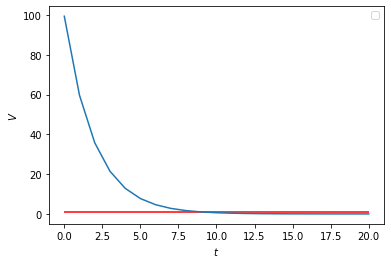

Na 10 trials is de associatieve sterkte onder de 1% van de associatieve sterkte aan het begin.


In [8]:
v_ext, d_ext = rescorla_wagner(0.4, v[-1], 0, 20)
plt.hlines(v[-1]/100, 0, 20, colors='red')
plot_trials(r"$t$", r"$V$", [], v_ext)
print("Na 10 trials is de associatieve sterkte onder de 1% van de associatieve sterkte aan het begin.")

### Q2.d (5 punten)

Plot ook de absolute waardes van $\Delta V$ in een aparte grafiek, wat gebeurt daar mee?

Als je $\Delta V$ zou moeten omschrijven als een cognitief of psychologisch process, wat zou dat zijn? Waarom is het aan het begin van extinctie groot en later kleiner?

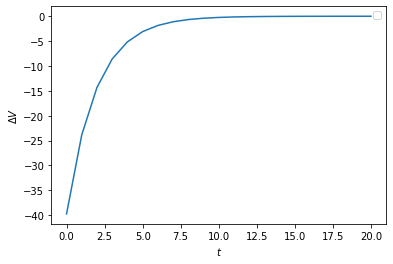

In [9]:
plot_trials(r"$t$", r"$\Delta V$", [], d_ext)

> Als ik $\Delta V$ zou moeten omschrijven als een cognitief of psychologisch process, dan zou dat 'vergeten' zijn. $\Delta V$ geeft aan na elke trial hoeveel de associate sterkte is afgenomen. Aan het begin vergeten we vaak de meeste details van iets, daarom is de extinctie groot aan het begin. Later word de extrinctie kleiner omdat er dan nog de alleen de rode draad overblijft en die vergeten we wat minder snel.

---

## 3. Compound stimuli

De basis van het Rescorla-Wagner model is duidelijk. Nu gaan we kijken naar het Rescorla-Wagner model voor compound stimuli. Bij compound stimuli bestaat de CS niet uit van 1 stimulus maar uit een samenstelling van meerdere stimuli, bijvoorbeeld A (belletje) en B (lampje). Zoals in het college besproken, wordt de maximale associatieve waarde ($V_{max}$) van de US dan verdeeld over de stimuli A en B (etc.). 

Het idee hierachter is dat het associatieproces wordt gestuurd door aandacht. De stimulus waar de meeste aandacht aan wordt besteed, of die de meeste aandacht vraagt, zal een hogere learning rate krijgen. Daarom zullen stimuli die meer opvallen een sterkere associatie krijgen. Het is mogelijk dat de aandacht die een stimulus krijgt ervoor zorgt dat associaties beter of langer in het geheugen worden opgeslagen.

Aandacht is een hele efficiënte manier om leren te versnellen. Het implementeren van aandacht speelt ook een belangrijke rol in de ontwikkelingen van deep neural networks. Als je hier meer over wilt lezen kijk dan eens naar https://arxiv.org/abs/1802.04712 of https://dl.acm.org/doi/10.1145/3055635.3056621. We weten nog steeds niet precies hoe aandacht werkt, maar deze papers laten zien hoe het mogelijk geïmplmenteerd kan worden in DNN en hoe dat het leren kan versnellen!

Neem voor de volgende opdracht aan dat er twee stimuli zijn: A 🔔 en B 💡. Stimulus A (het belletje) is indringender dan stimulus B (het lampje), dus A krijgt meer aandacht en heeft een hogere leersnelheid ($\alpha = 0.4$) dan stimulus B ($\alpha = 0.1$). Neem aan dat $V_{max}$ weer 100 is en $V_{t=0}=0$.

<br>

### Q3.a (5 punten)
Maak één grafiek met de associatieve sterktes van A ($V_A$), B ($V_B$) en de compound A en B ($V_A + V_B$), drie lijnen in totaal. Schrijf hiervoor een nieuwe functie `rescorla_wagner_cs()` en plot deze drie associatieve sterktes voor 20 leertrials. Baseer deze functie op je originele `rescorla_wagner()`. 

**Let op!** Als het goed is kan $V_A+V_B$ nooit meer zijn dan $V_{max}$. 

In [10]:
def rescorla_wagner_cs(alpha_a, alpha_b, v_start, v_max, trials):
    v_a_list = [v_start]
    delta_a_list = [alpha_a*(v_max - v_start)]
    v_b_list = [v_start]
    delta_b_list = [alpha_b*(v_max - v_start)]
    cp_list = [v_start]

    for _ in range(trials):
        v_a_t = v_a_list[-1] + delta_a_list[-1]
        v_a_list.append(v_a_t)
        v_b_t = v_b_list[-1] + delta_b_list[-1]
        v_b_list.append(v_b_t)
        dv_a_t = alpha_a*(v_max - (v_a_t+v_b_t))
        delta_a_list.append(dv_a_t)
        dv_b_t = alpha_b*(v_max - (v_a_t+v_b_t))
        delta_b_list.append(dv_b_t)
        cp_list.append(v_a_t+v_b_t)

    return (v_a_list, delta_a_list, v_b_list, delta_b_list, cp_list)

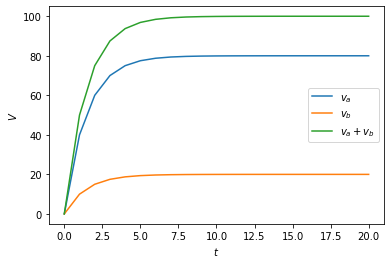

In [11]:
va, dva, vb, dvb, cp = rescorla_wagner_cs(0.4, 0.1, 0, 100, 20)
plot_trials(r"$t$", r"$V$", [r"$v_a$", r"$v_b$", r"$v_a + v_b$"], va, vb, cp)

### Q3.b (4 punten)

Bij het begin van het experiment zijn alle associatie sterktes $V$ = 0. Wat zijn de associatie sterktes van $V_A$, $V_B$ en $V_A + V_B$ na de eerste trial? En wat zijn de waardes na 20 trials?


In [12]:
print("Na de eerst trial: ")
print("Va:     ", va[1])
print("Vb:     ", vb[1])
print("Va + Vb:", cp[1])

print("\nNa de 20 trials: ")
print("Va:     ", va[20])
print("Vb:     ", vb[20])
print("Va + Vb:", cp[20])

Na de eerst trial: 
Va:      40.0
Vb:      10.0
Va + Vb: 50.0

Na de 20 trials: 
Va:      79.99992370605469
Vb:      19.999980926513672
Va + Vb: 99.99990463256836


---

## 4. Blocking

Ga er bij het volgende experiment van uit dat er weer twee stimuli zijn: een belletje A 🔔 en een lampje B 💡. Dit keer is het lampje even duidelijk als het belletje (zet voor beiden stimuli $\alpha = 0.2$). Alleen nu zal bij dit blocking experiment alleen stimulus A in de eerste fase worden aangeboden en daarna na een tijd beiden stimuli tegelijk:

fase 1:  CS$_A$ $\rightarrow$ US (20 trials)

fase 2:  CS$_A$ + CS$_B$ $\rightarrow$ US (20 trials)

### Q4.a (3 punten)

Bij het begin van het experiment zijn alle associatie sterktes 0. Wat is de associatie sterktes $V_A$ na de eerste trial in fase 1? En van $V_B$ na de eerste trial in fase 1? En beide waardes na de tweede trial in fase 1? 

**Let op!** je kan hier gebruik maken van de functie die je voor opdracht 3 over compound stimuli hebt geschreven: `rescorla_wagner_cs()`.

In [13]:
print("Na de eerst trial: ")
print("Va:     ", va[1])
print("Vb:     ", vb[1])

print("\nNa de 20 trials: ")
print("Va:     ", va[2])
print("Vb:     ", vb[2])

Na de eerst trial: 
Va:      40.0
Vb:      10.0

Na de 20 trials: 
Va:      60.0
Vb:      15.0


### Q4.b (5 punten)

Bereken nu de associatieve sterktes van $V_A$ en $V_B$ voor de 20 trials in fase 1, en dan voor de 20 trials in fase 2. Maak één grafiek met de associatieve sterktes van $V_A$ en $V_B$ voor deze 40 trials in totaal. 

Wat gebeurt er met de associatieve sterktes van stimulus B? Hoe zal de hond reageren als er na deze 40 trials alleen een lampje aangaat zonder bel?

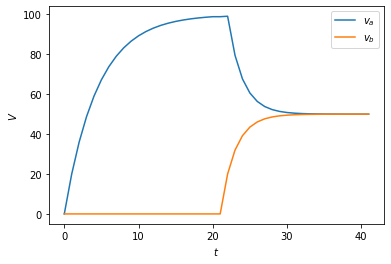

In [14]:
va_1, _, vb_1, _, _ = rescorla_wagner_cs(0.2, 0, 0, 100, 20)
_, _, vb_2, _, _ = rescorla_wagner_cs(0.2, 0.2, 0, 100, 20)
va_2, _, _, _, _ = rescorla_wagner_cs(0.2, 0.2, va_1[-1], 100, 20)
plot_trials(r"$t$", r"$V$", [r"$v_a$", r"$v_b$", r"$v_a + v_b$"], va_1 + va_2, vb_1 + vb_2)

> Omdat er tijdens fase 1 geen stimuli is voor het lampje, blijft de associatie sterkte voor het belletje op 0 de eeerste 20 trials. Daarna gaat de associatie leggen met zowel het belletje als het lampje. Dit zorgt ervoor dat tijdens fase 2 de associatie sterkte voor het belletje toeneemt en de associatie sterkte van het lampje neemt af.

---

## 5. Latent inhibition

In het volgende experiment zijn er twee honden. De eerste hond, Schnauzie 🐕, wordt in een hok gehouden waar af en toe, zonder goede reden, een belletje af gaat (🔔CS). Als het belletje gaat gebeurt er verder niks. De tweede hond, Bello 🐩, wordt in een hok gehouden waar helemaal nooit iets te horen valt. Vervolgens doen beiden honden mee aan het experiment van Pavlov waarbij een belletje (🔔CS) aan een een beloning (🦴️US) wordt gekoppelt.

<br>

### Q5.a (5 punten)

Simuleer de data voor beiden honden en plot de learning curves van pre-exposure en leertrials samen in één grafiek ($\alpha = 0.4$). Gebruik 10 pre-trials voor de pre-exposure van Schnauzie ($V_{max}=0$), en dan 10 leertrials voor beiden honden (nu wel een beloning dus $V_{max}$ = 100). 

Je kan voor de pre-exposure en leertrials `rescorla_wagner()` gebruiken om de waardes van $V$ uit te rekenen, of je kunt een nieuwe functie schrijven.

Leg uit wat je ziet in de grafiek, klopt dit met wat je hebt geleerd over pre-exposure leercurves?


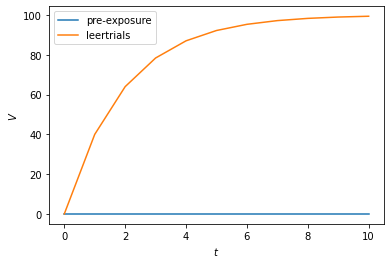

In [15]:
v_pre, d_pre = rescorla_wagner(0.4, 0, 0, 10)
v_sn, d_sn = rescorla_wagner(0.4, v_pre[-1], 100, 10)
v_bl, d_bl = rescorla_wagner(0.4, 0, 100, 10)
plot_trials(r"$t$", r"$V$", ["pre-exposure", "leertrials"], v_pre, v_sn)

> Met het Rescorla Wagner model word er geen rekening gehouden met pre-exposure, en daarom blijft de associatie sterkte voor de pre-exposure op 0 na 10 trials. Hierdoor is de leertrial met of zonder exposure precies hetzelfde, en zie je geen verschil.

### Q5.b (4 punten)

Hieronder de data van een echt pre-exposure effect:
<img src="Images\curves.png" alt="Drawing" style="width: 600px;"/>


Hoe verschillen jouw learning curves met die van een echt pre-exposure effect? Wat is daar een mogelijke verklaring voor? Hoe zou jij het Rescorla-Wagner model aanpassen om dit te ondervangen?

> Bij mij is er geen verschil in de learning curves tussen Bello en Schnauzie. Dit is omdat het pre-exposure effect niet word meegenomen in een Rescorla_Wagner model. Zowel Bello en Schnauzie begonnen de leertrials met een associatie sterkte van 0, en daarom is het niet terug te zien in de grafiek dat schnauzie pre-exposure heeft gehad. Om dit probleem op te lossen in het Rescorla-Wagner model, moet er iets zijn wat kijkt naar het verleden (terug in de tijd). Bijvoorbeeld door een extra delta V te introduceren, die nu het verschil bekijkt tussen $\mathbf{V}_{\text{max}}$ en $\mathbf{V}_{t-2}$ of $\mathbf{V}_{t-5}$. Zodat het model ook kijkt naar de associate sterkte verder dan 1 stapje terug.

---

# Pt. 2 Pearce-Hall error learning theory

Een van de meest voor de hand liggende oplossing van *latent inhibition* is dat de learning rates verschillen. Het Pearce Hall leermodel (PH) kan onder andere latent inhibition verklaren. Als je hier meer over wilt lezen: Pearce J.M. and Hall G. (1980) [A model for Pavlovian learning: Variations in the effectiveness of conditioned but not of unconditioned stimuli. Psychological Review](https://pdfs.semanticscholar.org/3630/3957caa2ebda4d04b6f25334d4fe9bf4b3cf.pdf).

Volgens het PH model wordt de verandering in de associatieve sterkte ($\Delta V$) bepaald door de volgende vergelijking:

$$\Delta V = S * \alpha * V_{max}$$

De scalar $S$ wordt bepaald door de intensiteit van de CS en door de intensiteit van de US. De parameter $\alpha$ vertegenwoordigt de _associability_ van de CS en wordt verondersteld <u>hoog</u> te zijn voor een nieuwe stimuli. De parameter $S$ zagen we in het college ook als parameter $\beta$ bij het RW model. De intensiteit kan dus ook weer in verband worden gebracht met aandacht: hoe intenser, hoe meer aandacht en hoe sneller het leren gaat. 

In tegenstelling tot de $\alpha$ in het RW-model is $\alpha$ in het Pearce-Hall-model niet statisch maar dynamisch. Voor het RW model is de learning rate $\alpha$ constant en bepaald alleen de grote van de verrassing (*prediction error*), dus of er veel of weinig geleerd wordt (ofwel hoe groot $\Delta V$ is). Bij het PH-model kan de  _associability_ rate $\alpha$ juist veranderen. Deze wordt bepaald door:

$$ \alpha_{t} = |V_{max} - \sum V_{t-1}|$$

Hierbij is $\sum V$ de som van de associatie sterktes van alle stimuli die aanwezig zijn op tijdstip $t-1$. Dat wil zeggen, de waarde van $\alpha$ op tijdstip $t$ wordt bepaald door de absolute waarde van het verschil tussen $V_{max}$ en de som van de associatie sterktes van _de vorige_ leertrial. Dit betekent dat een grote (absolute) prediction error ervoor zorgt dat er sterk geleerd wordt op _de volgende_ trial. Dus een grote verassing zorgt dat er in de toekomst sneller geleerd wordt. 

Bij eenvoudige *conditionering*, waarbij een CS betrouwbaar is gekoppeld aan een US, verhoogt $V$ op basis van ervaring  en  daalt $\alpha$ (nadert nul naarmate asymptoot in leren wordt bereikt). De scalar $S$ wordt wel verondersteld statisch te zijn, en lijkt in die zien dus meer op de learing rate in het RW model.

### Q.6a (6 punten)
Schrijf een functie `pearce_hall()` die $\Delta V$, $V$ en $\alpha$ als output heeft, zodat je kan bijhouden hoe deze waardes per trial veranderen.

Om je op weg the helpen:

`def pearce_hall(S, alpha =.7, v_start=0, v_max=1, trials=10):` 

oftewel, de input voor het model is scalar $S$, het begint met een hoge associability $\alpha$, want stimuli zijn nieuw, en $V = 0$ en $V_{max}$ = 1. 


In [16]:
def pearce_hall(S, alpha =.7, v_start=0, v_max=1, trials=10):
    a = [alpha]
    dv = [S*alpha*v_max]
    v = [v_start]
    
    for _ in range(trials):
        v_t = v[-1] + dv[-1]
        a_t = abs(v_max - v[-1])
        dv_t = S*a_t*v_max
        v.append(v_t)
        dv.append(dv_t)
        a.append(a_t)
        
    return (dv, v, a)

* Plot met behulp van deze functie de curves voor $\Delta V$, $V$ en $\alpha$ in drie aparte grafieken voor 10 trials met verschillende waardes van $S$: 0.2 en 0.6

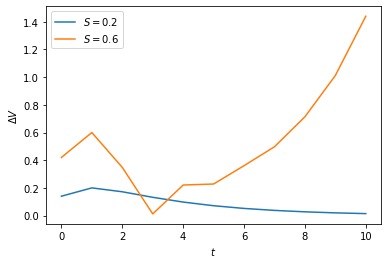

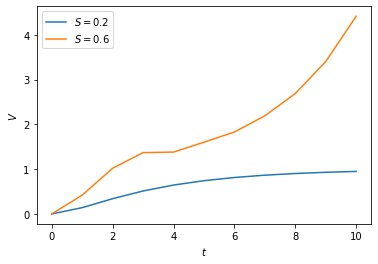

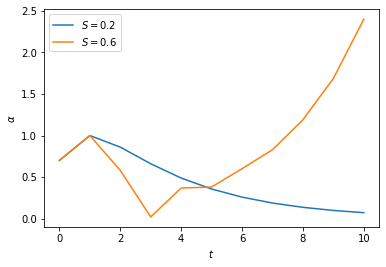

In [17]:
dv_2, v_2, a_2 = pearce_hall(0.2)
dv_6, v_6, a_6 = pearce_hall(0.6)
plot_trials(r"$t$", r"$\Delta V$", [r"$S = 0.2$", r"$S = 0.6$"], dv_2, dv_6)
plot_trials(r"$t$", r"$V$", [r"$S = 0.2$", r"$S = 0.6$"], v_2, v_6)
plot_trials(r"$t$", r"$\alpha$", [r"$S = 0.2$", r"$S = 0.6$"], a_2, a_6)

* Vergelijk deze grafieken met de leercurves van het RW model; 
* Beschrijf wat de verschillende waardes van $S$ voor invloed hebben op $\Delta V$, $V$ en $\alpha$.

> de leercurves van het RW model hadden vaak een logaritmische groei of daling, terwijl het nu meer een soort polynomische curve. Bij S = 0.6 gaat de associatie waarde op een gegeven moment snel omhoog, maar bij s = 0.2 heeft de associate waarde een afnemende daling (kan je ook zien aan dat $\Delta V$ daalt).

* Laat vervolgens in een plot zien dat pre-exposure wel invloed heeft, en je dus wel een (klein) effect van latent inhibition ziet. (Tip! leer het model eerst voor 10 trials met $V_{max}=0$ ga dan verder met de $\alpha$ die je dan hebt).

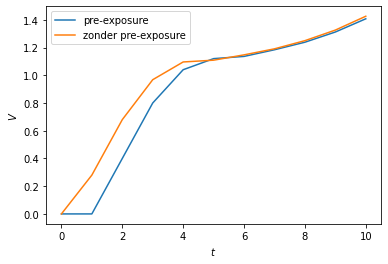

In [18]:
_, _, a_pre = pearce_hall(0.4, v_max = 0)
_, v_pre, _ = pearce_hall(0.4, alpha = a_pre[-1])
_, v, _ = pearce_hall(0.4)
plot_trials(r"$t$", r"$V$", ["pre-exposure", "zonder pre-exposure"], v_pre, v)

###  Pearce-Hall and beyond

Onlangs is er bewijs gevonden voor zowel PH- als RW-leersignalen in het menselijk brein, wat suggereert dat het onderliggende algoritme aspecten van beide integreert. Het kan zijn dat grote prediction errors leiden tot een directe impact op het leren van de huidige gebeurtenis (grote $\Delta V$), maar ook de aandacht richten op toekomstige gebeurtenissen (vergroten van $\alpha$) en zo het leren bij volgende gebeurtenissen vergroten (of juist de aandacht verminderen omdat er een tijdje niets interessants gebeurt en de $\alpha$ verlagen). 

De Pearce Hall modellen waren wat minder populair dan het Rescorla Wagner model, dus veel van huidge Reinforcement Learning modellen hebben geen dynamische learning rates. Toch is dat erg belangrijk, en je ziet ook dat dit soort modellen weer in opkomst zijn. Voor het oplossen van bepaalde Reinforcement Learning problemen gaan kunstmatige intelligentie onderzoekers vaak gewoon een paar learning rates uitproberen om te kijken welke het beste werkt. Op basis van de inzichten uit deze voorbeelden zouden sommige modelen dus makkelijker verbeterd kunnen worden door dynamische learning rates toe te voegen. 

Suggesties om verder te lezen:

Pearce and Hall (1980) [A model for Pavlovian learning: Variations in the effectiveness of conditioned but not of unconditioned stimuli. Psychological Review](https://pdfs.semanticscholar.org/3630/3957caa2ebda4d04b6f25334d4fe9bf4b3cf.pdf) <br>
Roesch et al. (2002) [Surprise! Neural Correlates of Pearce-Hall and Rescorla-Wagner Coexist within the Brain](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3325511/#R92) <br>
Behrens et al. (2007) [Learning the value of information in an uncertain world](https://www.nature.com/articles/nn1954) <br>
Piray & Daw (2020) [A simple model for learning in volatile environments](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007963#pcbi.1007963.ref006)


### Q.6b (2 punten)
Kan je bedenken in wat voor omgeving een dynamische learning rate handig kan zijn en wanneer juist niet? Je kan inspiratie opdoen in Behrens et al. (2007) en  Piray & Daw (2020).

> Een dynamische learning rate is belangrijk wanneer bepaalde dingen die in het verleden zijn gebeurt meer invloed hebben op iets wat nu gebeurt. Bijvoorbeeld bij het maken van beslissingen. Het is niet handig wanneer er heel veel data is, met een dynamische learning rate krijg je te veel parameters om te leren.

---

# Pt. 3 Temporal Difference Learning 

Temporal difference learning is een uitbreiding op het RW model dat ook de rol van tijd en geheugen in het koppelen van CS en de US kan beschrijven. Het is een simpele uitbreiding van het Rescorla Wagner model en vormt tot op de dag van vandaag de basis van de meeste reinforcement learning algoritmes. 

Tijd is heel erg belangrijk omdat in de meeste gevallen beloningen van ons gedrag ver in de toekomst liggen. Denk bijvoorbeeld aan het spel Go. Pas aan het eind, als de winnaar bekend is gemaakt, komt er een beloning. We zouden niet willen zeggen dat alleen de laatste zet de winnende zet was, en dus alleen die geassocieerd moet worden met de beloning. Alle zetten hebben op een of andere manier meegeholpen aan de overwinning. Een van de grootste computationele uitdagingen is om ook deze zetten goed te associëren met de beloning. Dit heet ook wel het *credit assignment problem*. Temporal Difference Learning is een eerste, simpele, maar krachtige zet in die richting.

Details over het TD model zijn terug te vinden in de college slides, het hoofdstuk van Gureckis & Love [**computational reinforcement learning**](http://bradlove.org/papers/GureckisLovePress.pdf) en voor meer verdieping in het online boek van [**Sutton & Barto**](http://incompleteideas.net/book/bookdraft2018jan1.pdf) en dan met name hoofdstuk 6 en 12.

Het leren in deze opdracht speelt zich af in een simpel **Markov Reward Process** met de volgende structuur:

![](Images\random_walk.png)

De robot start elke episode in $C$, en gooit dan telkens een muntje op om te bepalen welke kant hij op gaat (kop = links, munt = rechts, beiden 50% kans). Zodra de robot een van de vierkanten eindpunten bereikt is de episode (het spel) over en begint de robot weer bij punt $C$. 

Alleen als de robot in het rechter eindpunt eindigt krijgt hij 1 punt, alle andere beloningen zijn nul. Toch zal de robot op een gegeven moment door hebben dat als hij naar rechts beweegt, hij steeds op een betere plek terecht komt. We kijken in dit voorbeeld nog even niet naar keuzes, er wordt telkens een muntje opgegooid, maar we brengen eerst in kaart hoe er een associatie kan komen tussen verschillende states and toekomstige beloningen. 

In het begin van het experiment heeft de robot geen enkele kennis van de wereld en geen enkele verwachtingen voor elke staat:

$$V(A)=V(B)=V(C)=V(D)=V(E)= 0$$

## 7. Het TD-model

Zoals gezegd is het TD model gebaseerd op de het RW model, met de aanpassing dat het de factor tijd kan meenemen. Er is een ander klein verschil in conventie die verwarrend kan zijn: <br>
De beloning in RW aangeduid met $V_{max}$, wat de maximale associatie waarde wordt genoemd. In reinforcement learning wordt deze term geïnterpreteerd als de grootte van de beloning zelf, en geschreven als $r$ van $r$eward. De logica is hetzelfde, een grotere beloning zou ook volgens het RW model een groter niveau van response moeten oproepen. Dus de klassieke notatie van RW was:

$$ V_{t+1} = V_t + \alpha(V_{max} - V_t) $$

Maar in context van reinforcement learning, and TD-learning, schrijven we het zo:

$$ V_{t+1} = V_t + \alpha(r_t - V_t) $$

Dit laatste is niet de correcte formulering van het TD model, maar maakt de connectie tussen RW en TD modelen als het goed is duidelijker. De volledige forumlering van het TD model is (zie [**computational reinforcement learning**](http://bradlove.org/papers/GureckisLovePress.pdf) en college slides):

$$V(s_t) = V(s_t) + \alpha [r_{t+1} + \gamma V(s_{t+1}) - V(s_t)]$$




### Q7.a (2 punten)

Stel de robot speelt dit spel voor de eerste keer en begeeft zich nu in state E. ![](Images\random_walk_reward.png)

In het begin is de verwachte waarde van staat E nul ($V(E)=0$). Nu gooit de robot het muntje op en stapt voor het eerst naar rechts en verdient $1$ punt.

Wat is hierna de verwachte waarde $V(E)$?

* Gegeven $\alpha = 0.1$ en $\gamma =1$? 
* En voor $\alpha = 0.6$ en $\gamma =1$?

Reken uit aan de hand van bovenstaande formule.

> $\alpha = 0.1: V(E) = 0 + 0.1(1 + 1*1 - 0) = 0.2$

> $\alpha = 0.6: V(E) = 0 + 0.6(1 + 1*1 - 0) = 1.2$

### Q7.b (6 punten)

Schrijf een functie `td_zero()` die als input, alpha ($\alpha$) , gamma ($\gamma$) en het aantal episodes accepteert. De output van deze functie moet een lijst met values $V$ zijn voor elke staat (A t/m E) na het leren van een aantal  episodes.


##### Pseudo code:
* Initieer de staat van de wereld:
    * Er zijn 7 states (5 letters & 2 endpoints), voor alle $V_{t=0} = 0$
* Creëer een `for loop` over alle episodes
    * Elke episode begint in state C
* In elke episode blijf je lopen tot je een van de eindpunten bereikt `while loop`
    * Gooi muntje op, en maak een stap, houd bij in welke state je bent.
    * Kijk wat je beloning is na maken van stap en update $V_{t}$
    * Eindpunt bereikt? Beeindig de episode en start een nieuwe, zo niet weer muntje opgooien

In [19]:
print([0]*6+[1])

[0, 0, 0, 0, 0, 0, 1]


In [20]:
def td_zero(alpha, gamma, episodes):
    r = [0]*6+[1]
    v = [0]*7
    for ep in range(episodes):
        t = 3
        loop = True
        while loop:
            coin = np.random.randint(2)
            # 0 = kop/link, 1 = munt/rechts
            if coin == 0:
                step = -1
            else:
                step = 1
            v[t] = v[t] + alpha*(r[t+step]+gamma*v[t+step] - v[t])
            t = t + step
            if t == 0 or t == 6:
                loop = False
    return v

Laat met behulp van deze functie de robot 100 episodes leren over deze wereld. Hoe zien zijn verwachtingen er uit voor elke state ($V$)
- Gegeven $\alpha$ = 0.1 en $\gamma$ = 1? 
- En voor $\alpha$ = 0.6 en $\gamma$ = 1? 

Welke is dichter bij de waarheid?

In [21]:
print(td_zero(0.1,1,100))
print(td_zero(0.6,1,100))

[0, 0.13910705290407335, 0.3377914435887436, 0.5283203730442837, 0.6917352419605609, 0.9033609682105925, 0]
[0, 0.03740075455089698, 0.31668463612104714, 0.6576232102477411, 0.9098705881030715, 0.9862391620382386, 0]


> *Antwoord*: $\alpha = 0.1$

---

## 8. MSE

Nu willen we weten hoe goed deze waardes die de robot toekent overeenkomen met de werkelijke staat van de wereld. Analytisch kan men bepalen dat dit de verwachte waarden moeten zijn als de robot voor altijd in dit universum zou ronddolen:

$$ V(A)=\frac{1}{6}\ ,\ V(B)=\frac{2}{6}\ ,\ V(C)=\frac{3}{6}\ ,\ V(D)=\frac{4}{6}\ ,\ V(E)=\frac{5}{6}$$

Net als bij vele statistische modelen en machine learning algoritmes beoordelen we deze leeruitkomsten niet op basis van absolute verschillen van deze waardes, maar op basis van mean squared error ($MSE$). De error is in dit geval dus het verschil tussen de verwachte waarde van een staat volgens de robot, en de analytisch-verwachte waarde.

Gebruikmakende van de eerdere $MSE$ functie, kunnen we onderzoeken hoe snel het algoritme dicht bij de echte waardes terecht komt, en welke parameter waardes voor $\alpha$ en $\gamma$ het snelst en/of het beste benaderen.

<br>

### Q8.a  (5 punten)

Schrijf nu een functie `MSE()` die de mean squared error berekent tussen de berekende verwachte waardes en de analytisch bepaalde verwachte waardes. Roep de functie `td_zero()` meerdere keren aan in een loop, elke keer met een ander aantal episodes (oplopend). Bereken dan telkens $MSE$, zodat je de veranderingen in $MSE$ per aantal episode kan volgen. Nu kan je verschillende leercurves met elkaar vergelijken. Als het goed is wordt elke episode de verwachte waarde van een states beter benaderd, en wordt de $MSE$ dus steeds kleiner.

In [22]:
np.square(np.array(td_zero(0.1, 1, 100)) - np.array([0, 1/6, 2/6, 3/6, 4/6, 5/6, 0]))

array([0.00000000e+00, 2.21410192e-03, 7.35729933e-03, 1.88334445e-02,
       5.21515794e-06, 1.25775608e-03, 0.00000000e+00])

In [23]:
def MSE(alpha, gamma, episodes):
    true = np.array([0, 1/6, 2/6, 3/6, 4/6, 5/6, 0])
    mse_list = []
    for ep in range(episodes):
        v = np.array(td_zero(alpha, gamma, ep))
        mse = np.sum(np.square(v - true))
        mse_list.append(mse)
    return mse_list

* Plot de leercurves voor $\alpha = 0.75$ en $\alpha = 0.15$ voor 1 tot 100 episodes in dezelfde grafiek ($\gamma=1$).

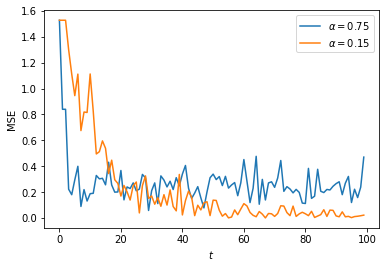

In [24]:
mse_75 = MSE(0.75,1,100)
mse_15 = MSE(0.15,1,100)
plot_trials(r"$t$", "MSE", [r"$\alpha = 0.75$", r"$\alpha = 0.15$"], mse_75, mse_15)

* Beschrijf welk model het beste is in het begin en welke aan het eind. Waardoor komt dat? Is een hoge learning rate altijd beter?

> In het begin is het model met de hoge learning rate en stuk sneller dicht bij de waarheid, maar aan het eind blijkt het model toch onstabiel doordat het meer door toevallige uitkomsten beinvloed wordt. Daarom is uiteindelijk het model met de lage learning rate dichter bij de waarheid.

### Q8.b  (5 punten)

Plot nu de leercurves voor $\gamma=1$, en $\gamma=0.5$ voor 1 tot 100 episodes ($\alpha = 0.1$).  Beschrijf hoe de leercurves lopen, en laat ook de uiteindelijke $V$ waardes voor elk model zien.

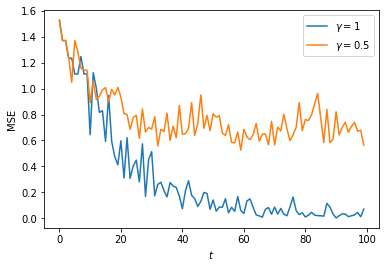

In [25]:
mse_1 = MSE(0.1,1,100)
mse_5 = MSE(0.1,0.5,100)
plot_trials(r"$t$", "MSE", [r"$\gamma = 1$", r"$\gamma = 0.5$"], mse_1, mse_5)

* Wat is het effect van $\gamma$? 
* Als je kijkt naar de uiteindelijke $V$'s hoe ziet de robot met $\gamma=0.5$ de wereld (in psychologische termen)? In wat voor een situatie zou dat goed zijn?

> *Antwoord*

---

## 9. Eligibility traces                                       

Tot nu toe onthield de robot alleen waar hij precies een stap geleden was. Dit maakt leren nog niet heel efficiënt. Het kan nog steeds lang duren voordat states (of later handelingen) credits krijgen terwijl ze ook erg dicht bij de beloning waren. Eligibility traces is een eerste stap om TD uit te breiden en om ook states die dichtbij het einddoel zijn credit te geven voor de uiteindelijke beloning (of het uitblijven daarvan). Het is wederom een zeer simpel en logisch proces, maar het maakt het leren veel efficiënter.

![](Images\random_walk_memory.png)

Je kan het vorige algoritme `td_zero()` zien alsof de robot alleen de vorige state kon onthouden. We breiden daarom nu het geheugen uit en daarmee kan hij langer dingen onthouden, en dus ook waardes toekennen aan states die langer in het verleden liggen. 

Dit gaat door middel van eligibility traces (zie college). Elke staat die recentelijk werd bezocht komt nu ook in aanmerking (is eligible) voor een value update zodra er een beloning valt. Hoe langer een staat niet bezocht is, des te minder deze in aanmerking komt voor een update. Hoe snel een staat in het verleden geen credit meer krijgt (niet meer eligible is) wordt geregeld via de $\lambda$ parameter:

$$ e_t(s)= \begin{cases}
\gamma \lambda e_{t-1}(s) & if\ s \neq s_t\\
1 & if\ s = s_t \end{cases} $$

Net als bij `td_zero()` heeft de laatst bezochte staat altijd eligibility waarde 1. Voor alle hiervoor bezochte states wordt de eligibility in waarde vermindert met parameter $\lambda$ en discount factor $\gamma$ (beide tussen 0 en 1).

In het nieuwe model worden dan de verwachte waarde van een alle states die eligible zijn (een $e$ >0) ge-update met de volgende regel:

$$\Delta V(s) = \alpha [r_{t+1} + \gamma V(s_{t+1}) - V(s_t)] e(s)$$

en dan natuurlijk:

$$V(s) = V(s) + \Delta V(s) $$

### Q9.a  (7 punten)

Implementeer eligibility traces in het `td_zero()` model, en maak er een nieuwe functie van `td_lambda()`. Hiervoor is het nodig om:

* Elke episode te beginnen met een lijst met eligibility values (EV), die begint met een eligibility van 0 voor voor alle states (A-E). 
* Deze lijst moet elke stap worden bijgehouden. Elke keer als de robot in een state komt krijgt deze EV = 1, maar hoe langer de robot niet meer in die state komt des te lager de EV wordt.
* Let op! de prediction error (PE) moet nu gebruikt worden om alle states te updaten met een eligibility waarde groter dan nul.
* Zorg dat de output van de functie een lijst is van states $V$ en een lijst van eligibility waardes $e$ (een lijst per episode). 

In [26]:
def td_lambda():
    # TO DO
    return

* Run de`td_lambda()` functie die je net gemaakt hebt met ($\lambda=0.5$) en zonder ($\lambda=0$) eligibility traces voor slechts 1 episode (episodes = 1, $\alpha = 0.2$, $\gamma = 1$);
* Rapporteer de lijst van values $V$ en de lijst van eligibilities $e$ voor beide algoritmes.

In [27]:
# TO DO

* Wat is het verschil tussen de twee verschillende $\lambda$ waardes en waarom?

> *Antwoord*

### Q9.b  (5 punten)

Illustreer nu het effect van verschillende waardes van $\lambda$ op de leercurve (wederom uitgedrukt in $MSE$). 

Run het `td_lambda() ` model voor 1 tot 200 episodes voor $\lambda=0.0$, $\lambda=0.5$, en $\lambda=0.9$ (voor alle modelen $\alpha=0.05$ en $\gamma=1$) en maak een grafiek.

In [28]:
# TO DO plot

Beschrijf aan de hand van de grafiek wat het effect van $\lambda$ op leren is.

> *Antwoord*